# Using the Exploratory Functions

This notebook contains examples of how to use the Exploratory module to do exploratory data analysis on your data.

In [1]:
from eagles.data_sets import data_loader as dl
from eagles.Exploratory import explore, missing, distributions
from eagles.Exploratory.utils import plot_utils as pu

import numpy as np

In [2]:
wines = dl.load_wines()
print(wines.shape)

(178, 14)


To make the data a little more realistic I'll add in some missing data.

In [3]:
wines = wines.mask(np.random.random(wines.shape) < .1)

## Missing Data

In [4]:
msg_df = missing.get_proportion_missing(df=wines, cols=[])

,feature,percent_missing
9,proanthocyanins,11.797753
6,total_phenols,11.235955
3,ash,10.674157
5,magnesium,10.674157
7,flavanoids,10.674157
11,hue,10.112360
4,alcalinity_of_ash,9.550562
13,proline,9.550562
0,class,8.988764
10,color_intensity,8.988764


If you would like a plot as well to see if there are any trends in the missing data you can simply set plot=True

,feature,percent_missing
9,proanthocyanins,11.797753
6,total_phenols,11.235955
3,ash,10.674157
5,magnesium,10.674157
7,flavanoids,10.674157
11,hue,10.112360
4,alcalinity_of_ash,9.550562
13,proline,9.550562
0,class,8.988764
10,color_intensity,8.988764


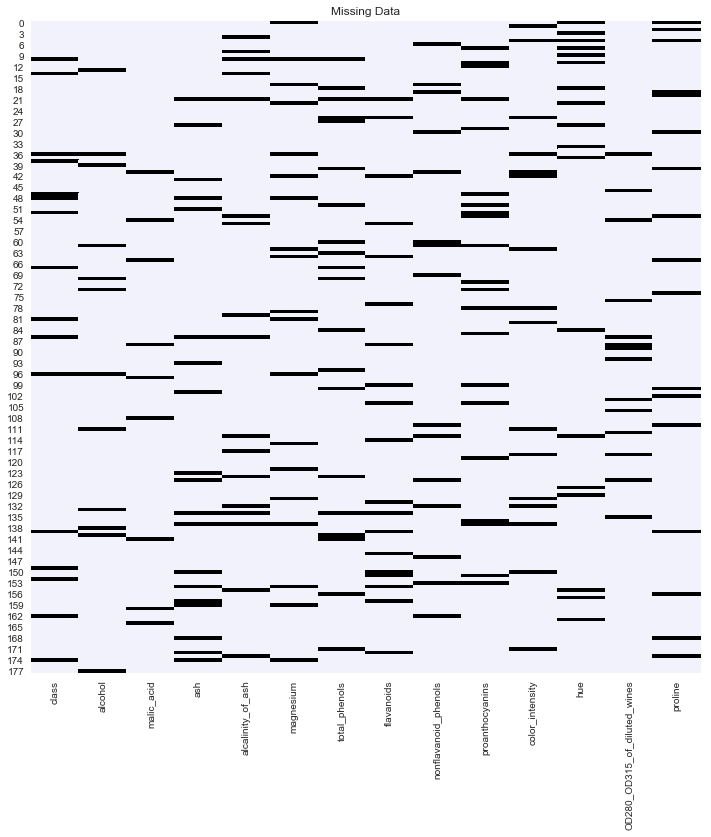

In [5]:
msg_df = missing.get_proportion_missing(df=wines, cols=[], plot=True)

## Get the base descriptive stats

In [6]:
descipt_df = explore.get_base_descriptives(data=wines)

,feature,mean,median,std,min,max,skew
0,class,1.944444,2.000,0.766131,1.00,3.00,0.094787
1,alcohol,12.990120,13.050,0.809476,11.03,14.83,-0.091715
2,malic_acid,2.338698,1.860,1.124495,0.74,5.80,1.055045
3,ash,2.359560,2.360,0.276820,1.36,3.23,-0.147217
4,alcalinity_of_ash,19.463354,19.400,3.343701,10.60,30.00,0.308367
5,magnesium,99.207547,97.000,14.377406,70.00,162.00,1.171423
6,total_phenols,2.291582,2.355,0.622166,0.98,3.88,0.107612
7,flavanoids,2.069748,2.190,1.002294,0.34,5.08,-0.027239
8,nonflavanoid_phenols,0.360552,0.340,0.121453,0.13,0.66,0.453527
9,proanthocyanins,1.567707,1.530,0.566896,0.41,3.58,0.567762


## Looking at Distributions and Potential Caps

,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.609072,15.418548,11.371169,10.561693,-0.091715
1,proline,1363.360953,1677.547641,NaN,NaN,0.805719
2,flavanoids,4.074336,5.076629,0.065161,-0.937132,-0.027239


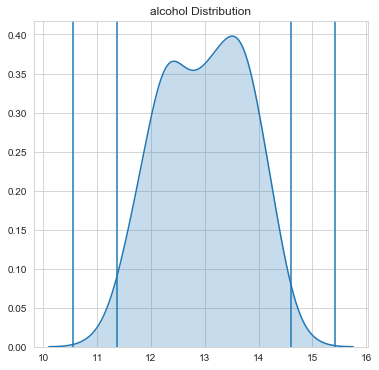

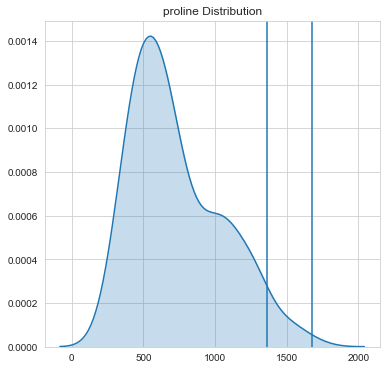

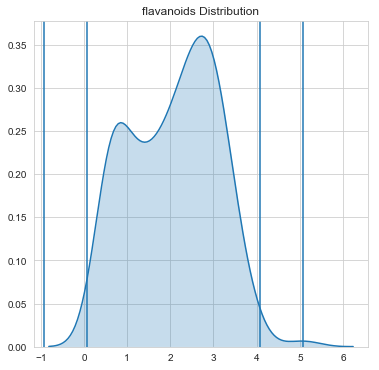

In [7]:
caps_df = distributions.find_caps(df=wines, cols=['alcohol', 'proline', 'flavanoids'], stats=['sd'] ,plot=True)

## Batteries

The run_battery() function allows you to run multiple test by simply calling the explore.run_battery() function. When no tests are passed into the tests parameter all available tests are run

,stat,value
0,n_rows,178.00
1,n_cols,13.00
2,total_memory,18640.00
3,total_percent_missing,9.33


,feature,percent_missing
8,proanthocyanins,11.797753
5,total_phenols,11.235955
2,ash,10.674157
4,magnesium,10.674157
6,flavanoids,10.674157
10,hue,10.112360
3,alcalinity_of_ash,9.550562
12,proline,9.550562
9,color_intensity,8.988764
7,nonflavanoid_phenols,8.426966


,feature,mean,median,std,min,max,skew
0,alcohol,12.990120,13.050,0.809476,11.03,14.83,-0.091715
1,malic_acid,2.338698,1.860,1.124495,0.74,5.80,1.055045
2,ash,2.359560,2.360,0.276820,1.36,3.23,-0.147217
3,alcalinity_of_ash,19.463354,19.400,3.343701,10.60,30.00,0.308367
4,magnesium,99.207547,97.000,14.377406,70.00,162.00,1.171423
5,total_phenols,2.291582,2.355,0.622166,0.98,3.88,0.107612
6,flavanoids,2.069748,2.190,1.002294,0.34,5.08,-0.027239
7,nonflavanoid_phenols,0.360552,0.340,0.121453,0.13,0.66,0.453527
8,proanthocyanins,1.567707,1.530,0.566896,0.41,3.58,0.567762
9,color_intensity,5.074074,4.750,2.344505,1.28,13.00,0.855594


,Feature,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,14.609072,15.418548,11.371169,10.561693,-0.091715
1,malic_acid,4.587689,5.712185,NaN,NaN,1.055045
2,ash,NaN,NaN,1.805919,1.529098,-0.147217
3,alcalinity_of_ash,26.150756,29.494457,NaN,NaN,0.308367
4,magnesium,127.962360,142.339767,NaN,NaN,1.171423
5,total_phenols,3.535915,4.158082,NaN,NaN,0.107612
6,flavanoids,4.074336,5.076629,0.065161,-0.937132,-0.027239
7,nonflavanoid_phenols,0.603459,0.724912,NaN,NaN,0.453527
8,proanthocyanins,2.701500,3.268396,NaN,NaN,0.567762
9,color_intensity,9.763084,12.107588,NaN,NaN,0.855594


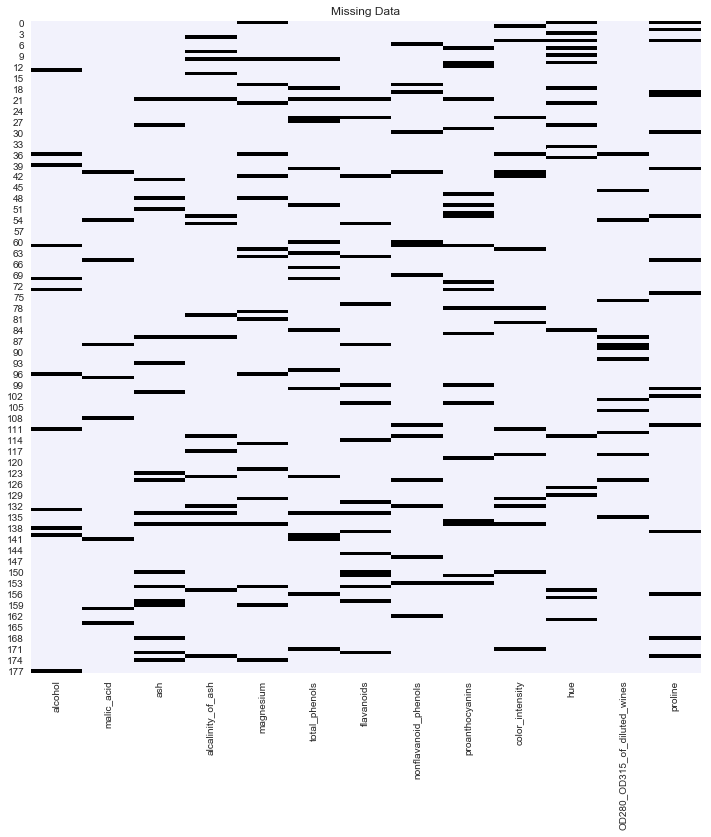

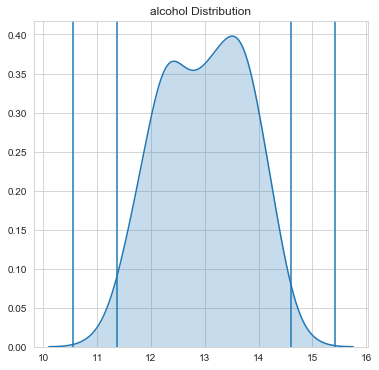

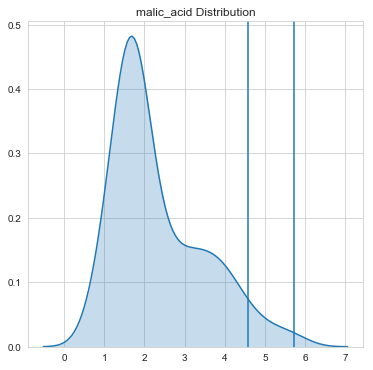

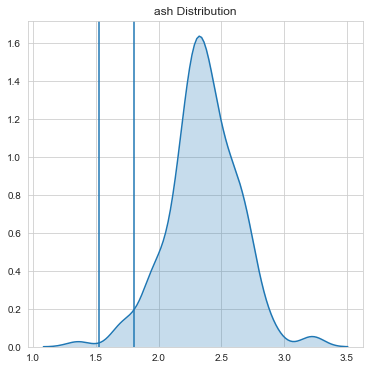

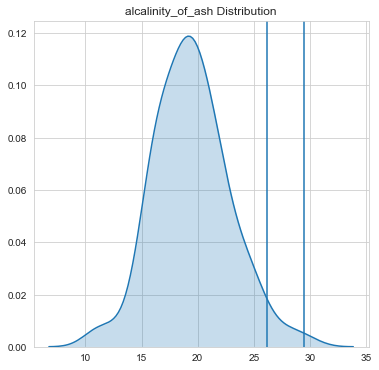

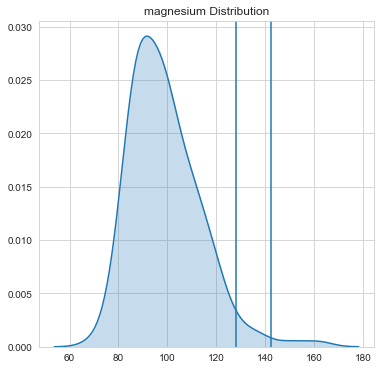

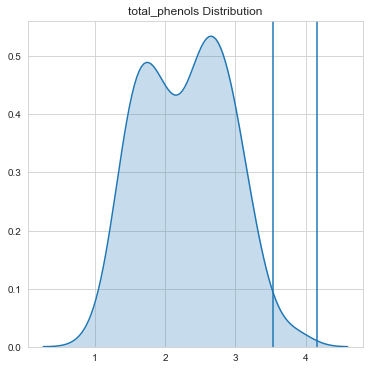

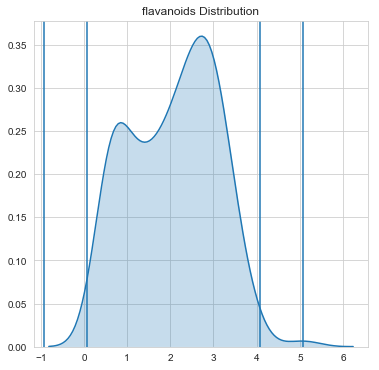

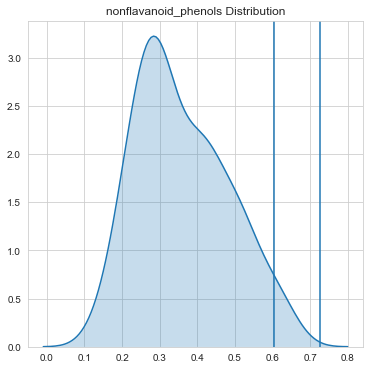

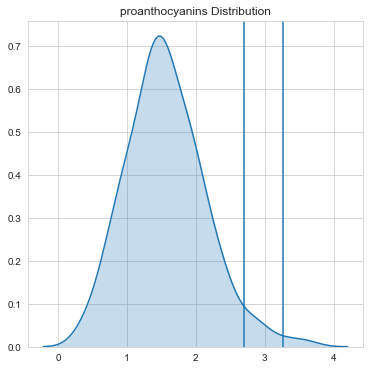

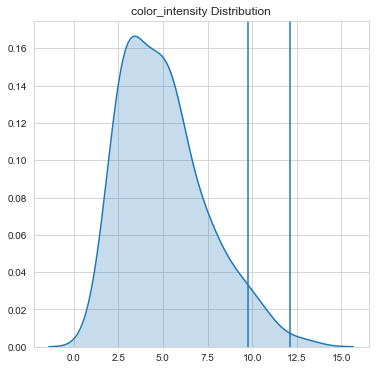

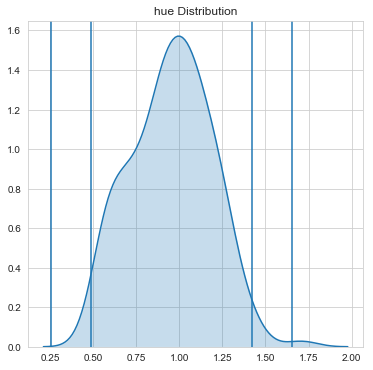

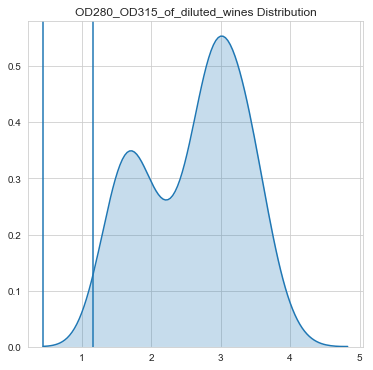

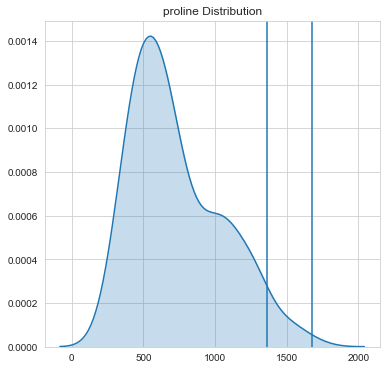

In [8]:
test_dict = explore.run_battery(data=wines, cols=[col for col in wines.columns if col != 'class'])